### `Project Description – Image classification using CNNs in Keras`



### `Data Description`

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.


### `Dataset`

The dataset can be download from Olympus.
The data file names are:
 images.npy
 Label.csv
The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.


### `Context`
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages


### `Objective`

 Pre-processing of image data.
 Visualization of images.
 Building CNN.
 Evaluate the Model.


### `Steps and tasks`

1. Import the libraries, load dataset, print shape of data, visualize the images in dataset
2. Data Pre-processing:
    a. Normalization.
    b. Gaussian Blurring.
    c. Visualize data after pre-processing.
3. Make data compatible:
    a. Convert labels to one-hot-vectors.
    b. Print the label for y_train[0].
    c. Split the dataset into training, testing, and validation set.
    d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN:
    a. Define layers.
    b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix.
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

In [3]:
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

In [5]:
# Mount Google drive so dataset can be accessed
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
images=np.load('/content/drive/My Drive/Colab Notebooks/images.npy')

In [7]:
data_label=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')

In [8]:
data_label.shape

(4750, 1)

In [9]:
images.shape

(4750, 128, 128, 3)

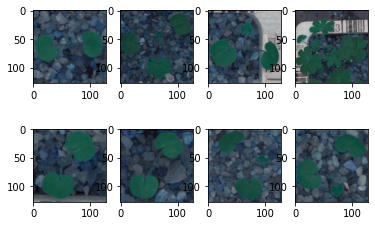

In [10]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])

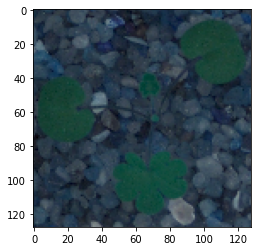

In [11]:
plt.imshow(images[1])
#plt.title(y[i])

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


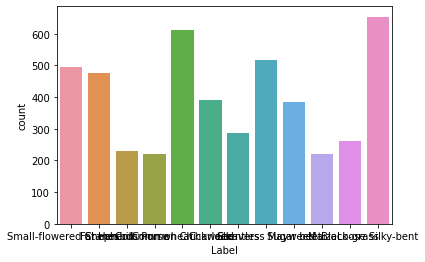

In [12]:
display(data_label['Label'].value_counts())
sns.countplot(data_label['Label'])
plt.show()


The data seems to be unevenly distributed here

## **Data PreProcessing:**

# Normalization

In [14]:
images = images.astype('float32') / 255.0

Gaussian Blurring

In [15]:
print(len(images))
print(images.shape)

4750
(4750, 128, 128, 3)


In [16]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(images):
  images[idx] = cv2.GaussianBlur(img, (5, 5), 0)

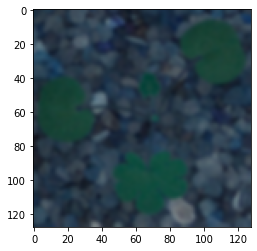

In [17]:
plt.imshow(images[1])
#plt.title(y[i])

# The image seems to be blurred here as compared to the one displayed earlier.

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#y = [[0], [1], [2], [3]]
#y = [0, 1, 2, 3]
#keras.utils.to_categorical(y)
ohe = OneHotEncoder()
label_dummies=ohe.fit_transform(data_label).toarray()
#label_dummies=pd.get_dummies(data_label)
print(label_dummies)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(images, label_dummies, train_size=0.7, random_state=0)

In [20]:
# Split data into test and train to build the model.
X_test_1, X_valid, y_test_1, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [21]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
# Print the shape of dataset.
print('x_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (3325, 128, 128, 3)
X_test shape: (1425, 128, 128, 3)
3325 train samples
1425 test samples


In [23]:
X_train.shape[1:]

(128, 128, 3)

The data is in right format in 2-D

In [24]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(128, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     9728      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0

In [25]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [26]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     9728      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0

In [33]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=12)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('Plant_Seedling_Checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [34]:
x_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
x_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
x_valid = X_valid.reshape(X_valid.shape[0], 128, 128, 3)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(713, 128, 128, 3)


In [30]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 12
epochs = 40
num_predictions = 20


Epoch 1/40
104/104 [==============================] - 10s 92ms/step - loss: 1.3020 - accuracy: 0.5468 - val_loss: 1.6352 - val_accuracy: 0.4323

Epoch 00001: val_loss improved from inf to 1.63516, saving model to Plant_Seedling_Checkpoint_01_loss1.6352.h5
Epoch 2/40
104/104 [==============================] - 10s 94ms/step - loss: 1.2576 - accuracy: 0.5675 - val_loss: 2.4553 - val_accuracy: 0.1488

Epoch 00002: val_loss did not improve from 1.63516
Epoch 3/40
104/104 [==============================] - 10s 95ms/step - loss: 1.2647 - accuracy: 0.5645 - val_loss: 1.9346 - val_accuracy: 0.2709

Epoch 00003: val_loss did not improve from 1.63516
Epoch 4/40
104/104 [==============================] - 10s 94ms/step - loss: 1.1834 - accuracy: 0.5880 - val_loss: 1.1966 - val_accuracy: 0.6435

Epoch 00004: val_loss improved from 1.63516 to 1.19664, saving model to Plant_Seedling_Checkpoint_04_loss1.1966.h5
Epoch 5/40
104/104 [==============================] - 10s 93ms/step - loss: 1.1683 - accurac

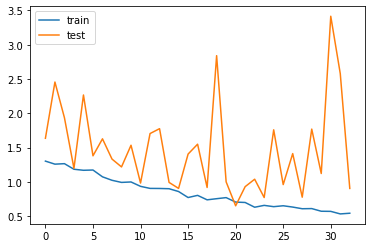

In [35]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [36]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 1s 25ms/step - loss: 0.9037 - accuracy: 0.7046
Test loss: 0.9036727547645569
Test accuracy: 0.7045614123344421


# The accuracy values seem to be decent around 70%. We can probably increase this by increasing number of iterations.

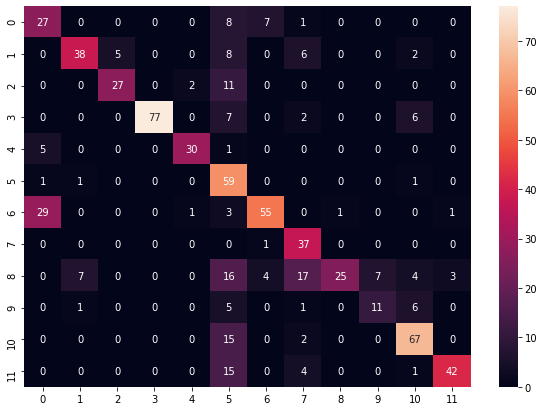

In [40]:
Y_pred = model.predict(x_valid)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

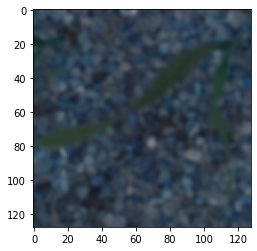

In [44]:
plt.imshow(x_test[2])


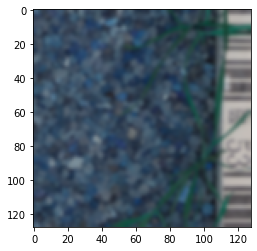

In [45]:
plt.imshow(x_test[3])


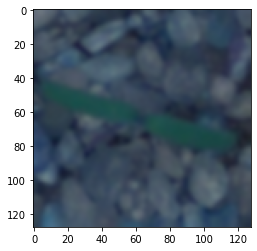

In [46]:
plt.imshow(x_test[33])

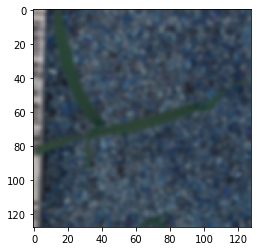

In [47]:
plt.imshow(x_test[36])

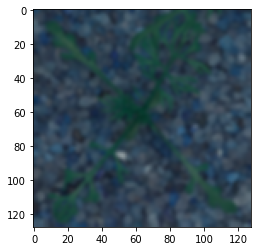

In [48]:
plt.imshow(x_test[59])